1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [1]:
#Libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from matplotlib.ticker import MaxNLocator

--2021-12-02 08:14:34--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connessione a www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2021-12-02 08:14:34--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc2c9702c185021430d3561f8209.dl.dropboxusercontent.com/cd/0/inline/BbFRXxFjI50FtHzMxY1Bd6BxxyVZ13qzYy4_bE67t401JkXL5yFEiNPFshDpR6OAKEGm1TfrdPWUMQZpiz07VV621MoYQMg2kcXQPuzgURIat8_5GTuLOKd5Yeti0J-lYE_OiTgqbkKymmOwAHL7wzWa/file# [segue]
--2021-12-02 08:14:34--  https://uc2c9702c185021430d3561f8209.dl.dropboxusercontent.com/cd/0/inline/BbFRXxFjI50FtHzMxY1Bd6BxxyVZ13qzY

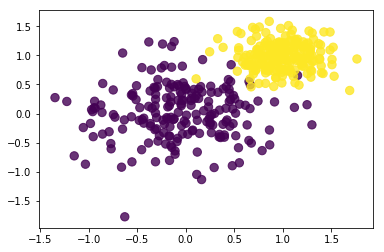

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [3]:
#function to generate sample
def sample_generator(sigma, mean):
        sample = np.random.normal(mean, sigma, (1000,2))
        return pd.DataFrame(sample, columns = ['x', 'y'])

sample1 = sample_generator(1,10)
sample2 = sample_generator(3,1)

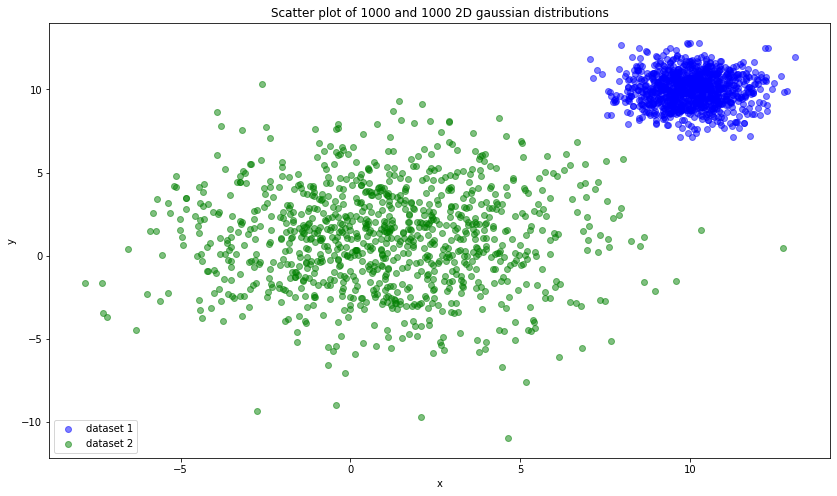

In [4]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Scatter plot of {len(sample1)} and {len(sample2)} 2D gaussian distributions')

plt.scatter(x=sample1['x'], y=sample1['y'], c = 'blue', alpha = 0.5, label = 'dataset 1')
plt.scatter(x=sample2['x'], y=sample2['y'], c = 'green', alpha = 0.5, label = 'dataset 2')

ax.legend(loc='lower left')
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

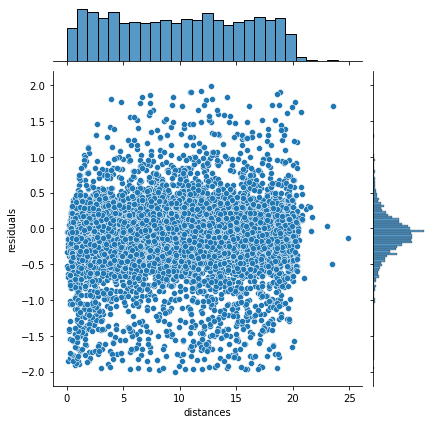

In [5]:
input_file = 'residuals_261.pkl'
data = np.load(input_file, allow_pickle=True)

#converting to Pandas Dataframe
dataframe = pd.DataFrame(data.item()) 

#selecting only entries smaller than 2
dataframe = dataframe[abs(dataframe['residuals']) < 2.]

dataframe.describe()

#Calculate a linear least-squares regression for the two sets 
regression = scipy.stats.linregress(dataframe['distances'], dataframe['residuals'])

#jointplot
sns.jointplot(data=dataframe, x='distances', y='residuals')


In [6]:
#appropriate binning chosen
binningX = np.linspace(0, 20, 100)

#finding bin centers
x = (binningX[1:] + binningX[:-1])/2

#adding a column in order to use groupby()
dataframe['bin'] = np.digitize(dataframe['distances'], bins=binningX)

y = dataframe.groupby('bin')['residuals'].mean()
erry = dataframe.groupby('bin')['residuals'].std()

array([<AxesSubplot:title={'center':'distances'}>], dtype=object)

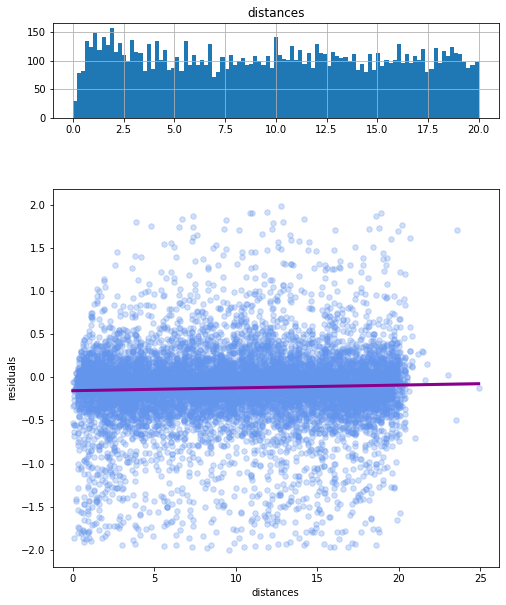

In [7]:
#plot creation of distance profile histogram without seaborn
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 8]})

sns.regplot( data = dataframe, x = 'distances', y = 'residuals', fit_reg = True, scatter_kws = {'s':30, 'alpha': 0.3, 'color': 'cornflowerblue'}, 
line_kws = { 'color': 'darkmagenta', 'linewidth': 3,'alpha': 1, 'label': 'seaborn regression result'})
dataframe.hist('distances', bins = binningX, ax=ax[0])


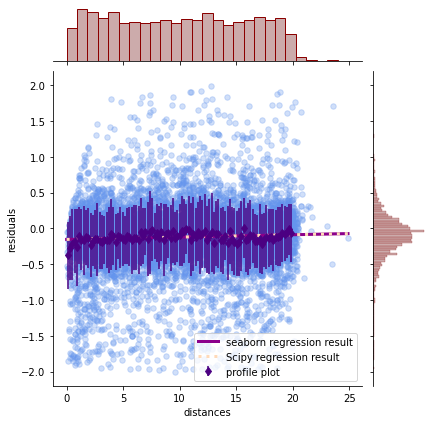

In [8]:
#plot creation with seaborn

g = sns.JointGrid(data = dataframe, x = 'distances', y = 'residuals')

#scatter plot
sns.regplot( data = dataframe, x = 'distances', y = 'residuals', fit_reg = True, scatter_kws = {'s':30, 'alpha': 0.3, 'color': 'cornflowerblue'}, 
line_kws = { 'color': 'darkmagenta', 'linewidth': 3,'alpha': 1, 'label': 'seaborn regression result'}, ax = g.ax_joint)

# scipy.stats.linregress plot
grid = np.linspace(dataframe['distances'].min(), dataframe['distances'].max(), 200)
g.ax_joint.plot( grid, regression.intercept + regression.slope*grid, color = 'peachpuff', linestyle = ':', 
linewidth = 3, label='Scipy regression result')

#plotting top and right histograms
sns.histplot(data = dataframe, y = 'residuals', color = 'rosybrown', edgecolor = 'darkred', ax = g.ax_marg_y)
sns.histplot(data = dataframe, x = 'distances', color = 'rosybrown', edgecolor = 'darkred', ax = g.ax_marg_x)


# profile plot
g.ax_joint.errorbar(x, y[:-1], yerr=erry[:-1], color='indigo',marker='d', linestyle= ' ',alpha=1,label = 'profile plot')

g.ax_joint.legend(loc='lower right')
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [34]:
#creating array 
sigma, mean, N = 1, 0, 500 
x = np.random.normal(mean, sigma, N)

#filling histo
nBins = 20
hist, bin_edges = np.histogram(x, bins=nBins)

#setting uncertanties according to Poisson's distribution
errors = np.sqrt(hist)

#finding bin width and bin centers
binWidth = bin_edges[1] - bin_edges[0]
binCenter = (bin_edges[1:] + bin_edges[:-1]) / 2

#set range
x1, x2  = mean-6*sigma, mean+6*sigma
grid = np.linspace(x1, x2, N)

In [35]:
# generate a 2Darray having gaussians as columns 
gaussians = np.array([ scipy.stats.norm.pdf(grid, loc=i, scale= 1.06 * x.std() * x.shape[0]**(-1./5) ) for i in x]).T

# sum the values of each gaussian 
sumGaussians = np.sum(gaussians, axis = 1)
# compute the kde by normalizing correctly the sums of the gaussians
KDE = (sumGaussians) * binWidth * N / scipy.integrate.trapz(sumGaussians, grid)

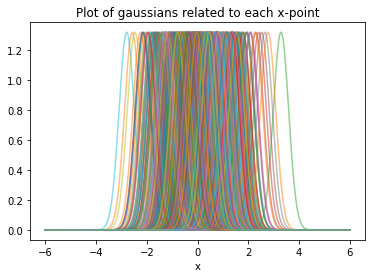

In [40]:
#plotting gaussians generated for each x

plt.title('Plot of gaussians related to each x-point')
plt.xlabel('x')

plt.plot(grid, gaussians, alpha=0.5)

plt.show()

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:376: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


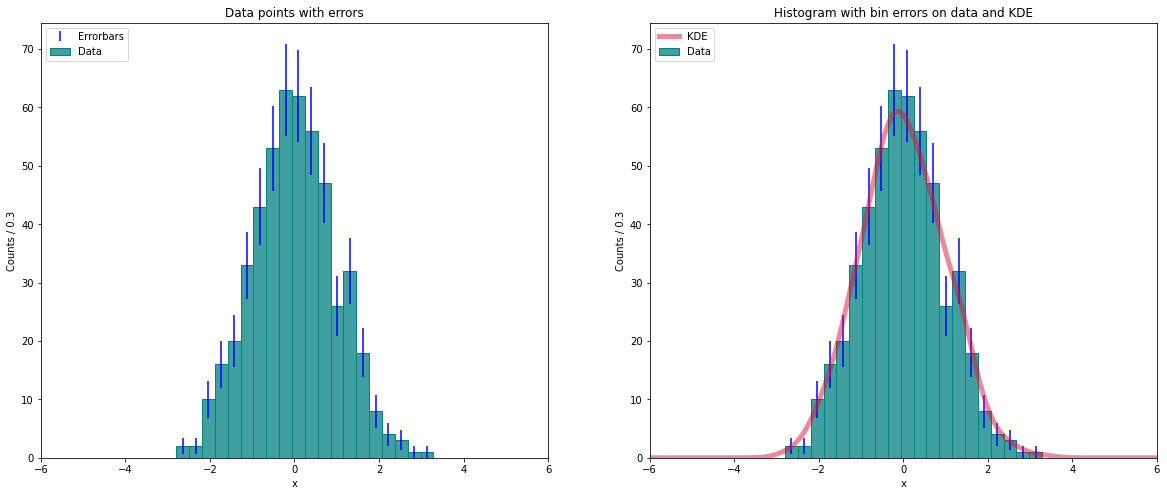

In [41]:
#create 2 plots:  data points histogram+ data points histo with KDE

fig, ax = plt.subplots(nrows=1, ncols=2, sharex='row', figsize=(20,8))

#set x-limits
ax[0].set_xlim(left=x1, right=x2)


#set titles
ax[0].set_title('Data points with errors')
ax[1].set_title('Histogram with bin errors on data and KDE')


#set labels
ax[0].set_xlabel('x')
ax[0].set_ylabel(f'Counts / {binWidth:.1f}'')

ax[1].set_xlabel('x')
ax[1].set_ylabel(f'Counts / {binWidth:.1f}'')


#histogram with errorbars (1st graph)
ax[0].errorbar(binCenter, hist, yerr = errors, linestyle = '',color = 'b', label = 'Errorbars')
sns.histplot(x=bin_edges[:-1],weights = hist,bins = bin_edges,color = 'teal',edgecolor = 'teal',
ax = ax[0], label = 'Data')


#KDE plot (2nd graph)
sns.histplot(x = bin_edges[:-1], weights = hist, bins = bin_edges, color = 'teal', edgecolor = 'teal', 
label = 'Data', ax = ax[1])

ax[1].errorbar( binCenter, hist, yerr=errors, linestyle='',color='b')
ax[1].plot( grid, KDE,  linewidth=5, color='crimson', alpha=0.5, label='KDE')

#set legends
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.show()